# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2201 Идрисов М.И. 
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [6]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
inf = float('inf')

In [7]:
def optimize_graph(arr, type="adj"):
    n=len(arr)
    m=len(arr[0])
    ret=[]
    default_weight=1

    if type=="adj":
        for i in range(n):
            for j in range(n):
                if i==j:
                    continue
                if arr[i][j]==float('inf'):
                    continue
                ret.append([i,j,arr[i][j]])
    if type=="inc":
        for i in range(m):
            for j in range(n):
                if arr[j][i]==1:
                    el_from=j
                if arr[j][i]==-1:
                    el_to=j
            ret.append([el_from, el_to, default_weight])
    
    return ret

def get_nodes(arr):
    nodes=set()
    for i in arr:
        nodes.add(i[0])
        nodes.add(i[1])
    return nodes

def visualize_graph(arr):
    G = nx.DiGraph()
    for el in arr:
        G.add_edge(el[0], el[1], weight=el[2])
    # Рисуем граф
    pos = nx.spring_layout(G, seed=1)  # Расположение узлов
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)

    # Рисуем веса ребер
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show() 


In [8]:
# 3 одинаковых графа
graphData=[
    [0,1,1],
    [0,2,1],
    [1,2,1],
    [2,1,1],
    [2,3,1]
]

adj = [
    [0,1,1,0],
    [0,0,1,0],
    [0,1,0,1],
    [0,0,0,0],
]

inc =[
    [ 1,  1, 0,  0, 0],
    [-1,  0, 1, -1, 0],
    [ 0, -1,-1,  1, 1],
    [ 0,  0, 0,  0,-1],
]

[[0, 1, 1], [1, 2, 1], [2, 3, 1], [3, 4, 1], [2, 0, 1], [4, 3, 1], [4, 5, 1], [5, 6, 1], [6, 0, 1], [0, 5, 1], [0, 4, 1]]
[[0, 1, 64], [0, 4, 20], [0, 5, 38], [1, 2, 93], [2, 0, 87], [2, 3, 17], [3, 4, 81], [4, 3, 81], [4, 5, 87], [5, 6, 37], [6, 0, 36]]


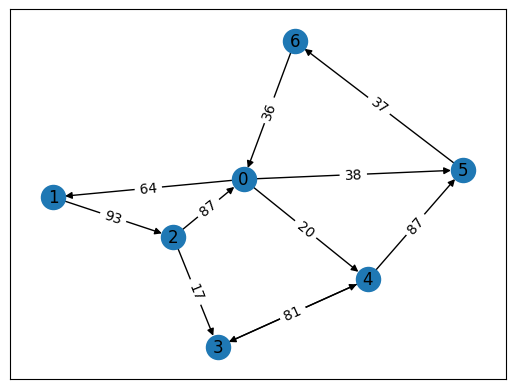

In [9]:
inc = [
    [ 1,  0,  0,  0, -1,  0,  0,  0,  -1,  1,1],
    [-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,0],
    [ 0, -1,  1,  0,  1,  0,  0,  0,  0,  0,0],
    [ 0,  0, -1,  1,  0, -1,  0,  0,  0,  0,0],
    [ 0,  0,  0, -1,  0,  1,  1,  0,  0,  0,-1],
    [ 0,  0,  0,  0,  0,  0, -1,  1,  0, -1,0],
    [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,0]
]


graph=optimize_graph(inc,type="inc")
print(graph)


adj = [
    [0, 64, inf, inf, 20, 38, inf],
    [inf, 0, 93, inf, inf, inf, inf],
    [87, inf, 0, 17, inf, inf, inf],
    [inf, inf, inf, 0, 81, inf, inf],
    [inf, inf, inf, 81, 0, 87, inf],
    [inf, inf, inf, inf, inf, 0, 37],
    [36, inf, inf, inf, inf, inf, 0],
]
graph=optimize_graph(adj,type="adj")
print(graph)
visualize_graph(graph)

In [12]:
def floydWarshall(graph):
    V=len(get_nodes(graph))
    # обьявляем массивы с расстояниями
    dist=[[inf]*V for _ in range(V)]
    next=[[None]*V for _ in range(V)]
    # добвляем известные значения
    for edge in graph:
        u,v=edge[0],edge[1]
        dist[u][v]=edge[2]
        next[u][v]=v
    # добвляем диагональные значения
    for i in range(V):
        dist[i][i]=0
        next[i][i]=i
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i][j]>dist[i][k]+dist[k][j]:
                    dist[i][j]=dist[i][k]+dist[k][j]
                    next[i][j]=next[i][k]
    return next

def floydWarshallReconstruct(i,k,next):
    if next[i][k]==None:
        return []
    path=[i]
    while i!=k:
        i=next[i][k]
        path.append(i)
    return path

In [13]:
path=floydWarshall(graph)
print(path)
shortest=floydWarshallReconstruct(0,3,path)
print(shortest)

[[0, 1, 1, 4, 4, 5, 5], [2, 1, 2, 2, 2, 2, 2], [0, 0, 2, 3, 3, 0, 0], [4, 4, 4, 3, 4, 4, 4], [5, 5, 5, 3, 4, 5, 5], [6, 6, 6, 6, 6, 5, 6], [0, 0, 0, 0, 0, 0, 6]]
[0, 4, 3]


### Вывод